# Importing libraries 

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Analysing Data

In [79]:
#loading the dataset
data = pd.read_csv("heart.csv")

In [81]:
#viewing the first few rows of the dataset 
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [83]:
data.shape

(918, 12)

In [85]:
#checking for missing values in each column
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [87]:
#Identifying unique categories within this column to determine which columns will be created during One-Hot Encoding
data.RestingECG.unique()


array(['Normal', 'ST', 'LVH'], dtype=object)

# Pre-processing Data

In [90]:
#Converting 0 values to NaN to flag them as missing data.
data['Cholesterol'] = data['Cholesterol'].replace(0, np.nan)
data['RestingBP'] = data['RestingBP'].replace(0, np.nan)

#Filling missing values with a median 
data['Cholesterol'] = data['Cholesterol'].fillna(data['Cholesterol'].median())
data['RestingBP'] = data['RestingBP'].fillna(data['RestingBP'].median())


In [92]:
#seperating the x and y features from the dataset 
x = data.drop("HeartDisease", axis=1)
y= data["HeartDisease"]

print("Feature shape:", x.shape)
print("Target shape:", y.shape)

Feature shape: (918, 11)
Target shape: (918,)


In [94]:
#Categorical variables are converted into numerical form using one-hot encoding to allow distance based learning.
categorical_cols = x.select_dtypes(include=['object']).columns
x_encoded = pd.get_dummies(x, columns=categorical_cols, drop_first=False, dtype=int)
print("Features are now fully numerical (Encoded).")

x_encoded


Features are now fully numerical (Encoded).


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160.0,180.0,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138.0,214.0,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150.0,195.0,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144.0,193.0,1,141,3.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130.0,131.0,0,115,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130.0,236.0,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [96]:
#splitting data into training and testing set 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_encoded , y , test_size = 0.3 , random_state = 0)

In [98]:
#for checking and debugging
print("Training set size:", x_train.shape)
print("Test set size:", x_test.shape)


Training set size: (642, 20)
Test set size: (276, 20)


In [100]:
# Applying Feature Scaling 
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

scaler = StandardScaler()

# this will fit and transform the numerical columns of the training set
x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])

# this will transform the numerical columns of the test set
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols]) 

print("Numerical features are now scaled.")
x_train

Numerical features are now scaled.


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
76,-2.285349,-0.832996,5.347625,-0.520852,-0.285721,-0.840524,0,1,1,0,0,0,0,1,0,1,0,0,1,0
48,-1.861947,-1.165091,1.826458,-0.520852,1.839893,0.104348,0,1,0,0,1,0,0,1,0,1,0,0,1,0
304,-0.274189,-2.106026,-0.092485,1.919930,-0.443173,1.238194,0,1,1,0,0,0,0,1,0,1,0,0,1,0
263,0.572615,-0.168806,-2.160472,-0.520852,-0.482537,-0.840524,0,1,1,0,0,0,0,1,0,1,0,0,1,0
744,0.678466,-0.888345,-0.222899,1.919930,0.895176,0.482297,0,1,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.043362,-1.275789,-0.055224,-0.520852,-0.443173,1.805117,0,1,1,0,0,0,0,1,0,0,1,0,1,0
192,-0.591741,-0.168806,0.056559,-0.520852,0.895176,-0.840524,0,1,0,1,0,0,0,1,0,1,0,0,0,1
629,0.360914,-0.279505,1.137129,-0.520852,0.855813,-0.840524,1,0,1,0,0,0,1,0,0,1,0,0,0,1
559,1.101868,0.052590,0.578213,-0.520852,-1.387891,2.938963,0,1,1,0,0,0,0,1,0,0,1,1,0,0


# data is now scaled, categorical columns have been converted and encoded

# Algorithm 1: K Nearest Neighbours(KNN from Scratch)

In [104]:
#defining the euclidean distance function 
def euclidean_distance(p1,p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))
    

In [106]:
def get_neighbors(x_train, y_train, test_point, k):
    distances = []

    #Iterating through the training set to compute the Euclidean distance for each data point
    for i in range(len(x_train)):
        dist = euclidean_distance(test_point, x_train[i])
        distances.append((dist, y_train[i]))
    
    #Sorting the distances in ascending order to identify the most similar data points
    distances.sort(key=lambda x: x[0])
    
    #This will get k closest labels
    neighbors = [distances[i][1] for i in range(k)]
    return neighbors


In [108]:
def predict_classification(x_train, y_train, test_point, k):
    #getting the labels of the k most similar training samples for test point
    neighbors = get_neighbors(x_train, y_train, test_point, k)
    
    #Calculating the frequency of zeros and ones
    values, counts = np.unique(neighbors, return_counts=True)
    
    #Performs a majority vote and returns the class label with the highest count
    return values[np.argmax(counts)]


In [110]:
def predict_knn(x_train, y_train, x_test, k):
    predictions = []

    #will loop through every individual patient record in the testing dataset and predict by
    #comparing the current patient to the training data.
    for test_point in x_test:
        prediction = predict_classification(x_train, y_train, test_point, k)
        predictions.append(prediction)

    #returns the full list as an arrayy
    return np.array(predictions)


In [112]:
# Convering pandas Dataframes and Series into NumPy arrays
X_train_np = x_train.values
X_test_np  = x_test.values
y_train_np = y_train.values
y_test_np  = y_test.values




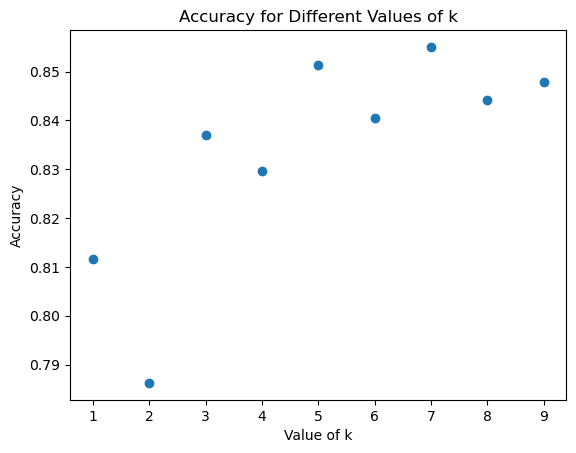

Result of accuracies on different k values:  [0.8115942028985508, 0.7862318840579711, 0.8369565217391305, 0.8297101449275363, 0.8514492753623188, 0.8405797101449275, 0.855072463768116, 0.8442028985507246, 0.8478260869565217]


In [114]:
accuracies = []
k_values = list(range(1, 10))

# Iterating through each k value and generating predictions for the current k value
for k in k_values:
    y_pred_knn = predict_knn(X_train_np, y_train_np, X_test_np, k)

    #Calculating the number of correct classifications
    correct = 0
    for true, pred in zip(y_test_np, y_pred_knn):
        if true == pred:
            correct += 1

    # Converting the count of correct predictions into accuracy.
    acc = correct / len(y_test_np)
    accuracies.append(acc)


# making the plot
plt.scatter(k_values, accuracies, marker='o')
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different Values of k")
plt.show()
print("Result of accuracies on different k values: ", accuracies)




In [115]:
# Finding the index of the highest accuracy
best_index = np.argmax(accuracies)

# Getting the actual k value and the actual accuracy using that index
optimal_k = k_values[best_index]
optimal_accuracy = accuracies[best_index]

print("optimal k value: " , optimal_k)
print("Accuracy of the algorithm: ", optimal_accuracy)

optimal k value:  7
Accuracy of the algorithm:  0.855072463768116


In [118]:
pd.DataFrame({'actual':y_test, 'predicted':y_pred_knn}, )

,actual,predicted
306,1,1
711,0,1
298,1,1
466,1,1
253,0,0
...,...,...
49,1,1
456,1,1
342,1,1
907,1,1


In [120]:
#confusion matrix implmentation from scratch
tp = tn = fp = fn = 0

for true, pred in zip(y_test_np, y_pred_knn):
    if true == 1 and pred == 1:
        tp += 1
    elif true == 0 and pred == 0:
        tn += 1
    elif true == 0 and pred == 1:
        fp += 1
    elif true == 1 and pred == 0:
        fn += 1

print("Confusion Matrix:")
print("TP:", tp, "FP:", fp)
print("FN:", fn, "TN:", tn)


Confusion Matrix:
TP: 147 FP: 26
FN: 16 TN: 87


In [122]:
#recall implementation from scratch
if tp + fn == 0:
    recall = 0
else:
    recall = tp / (tp + fn)

print("Recall:", recall)


Recall: 0.901840490797546


In [124]:
# precision implementation from scratch

if tp + fp == 0:
    precision = 0
else:
    precision = tp / (tp + fp)

# f1 score implementation from scratch
if precision + recall == 0:
    f1 = 0
else:
    f1 = 2 * (precision * recall) / (precision + recall)

print("F1-score:", f1)
print("precision:" , precision)



F1-score: 0.8749999999999999
precision: 0.8497109826589595


# Algorithm 2: Logistic Regression (using libraries)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [129]:
logr = LogisticRegression() #initializing the library for logistic regression
logr.fit(x_train , y_train) #training the model

LogisticRegression()

In [131]:
#making predictions on the test data
y_predict = logr.predict(x_test)


In [133]:
from IPython.display import display, Markdown

display(Markdown("## Logistic Regression: Test Set Results"))
print(f"Accuracy Score: {accuracy_score(y_test, y_predict):.4f}")

# Classification Report Table
# Converting the text-based classification report into a dictionary .
report_dict = classification_report(y_test, y_predict, output_dict=True)

#converting dictionary into a Pandas Dataframe to display a table
report_table = pd.DataFrame(report_dict).transpose()

display(Markdown("## Classification Report"))
display(report_table.round(2))


## Logistic Regression: Test Set Results

Accuracy Score: 0.8370


## Classification Report

,precision,recall,f1-score,support
0,0.81,0.78,0.80,113.00
1,0.85,0.88,0.86,163.00
accuracy,0.84,0.84,0.84,0.84
macro avg,0.83,0.83,0.83,276.00
weighted avg,0.84,0.84,0.84,276.00


In [135]:
#confusion matrix in table form
cm = confusion_matrix(y_test, y_predict)
cm_table = pd.DataFrame(cm, index=['Actual: No Disease (0)', 'Actual: Heart Disease (1)'], 
                        columns=['Predicted: No Disease (0)', 'Predicted: Heart Disease (1)'])

print("Confusion Matrix:")
display(cm_table)

Confusion Matrix:


,Predicted: No Disease (0),Predicted: Heart Disease (1)
Actual: No Disease (0),88,25
Actual: Heart Disease (1),20,143
